In [1]:
# Standard python imports
import os
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm, tnrange, tqdm_notebook

# Make reproducible
SEED = 32
np.random.seed(SEED)

# My module imports
import utils

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Getting Divergences CSV

In [2]:
# Maybe get the data .mat file
if not os.path.isfile("data.mat"):
    !wget https://www.dropbox.com/s/b1bnrj2f30xe1ns/xq_data_big.mat?dl=0
    !mv 'xq_data_big.mat?dl=0' data.mat

# Import the data from file
f = h5py.File("data.mat")
data_0, labels = np.array(f['data']), np.array(f['labels'])
f.close()

In [3]:
# Labels are off by 1 cuz matlab
labels = labels.squeeze().astype(int) - 1

In [4]:
# Get divergences csv
colInds = np.where(np.sum(data_0, axis=0) != 0.0)[0]
data = data_0[:, colInds].astype(int)
gene_scores = np.array([utils.gene_divergence(data[:, i], labels) for i in tnrange(data.shape[1])])
inds = np.argsort(gene_scores)[::-1]
colInds = colInds[inds]
gene_scores = gene_scores[inds]
df = pd.DataFrame({"Gene_index":colInds, "Divergence_across_classes":gene_scores})
df.to_csv("assets/divergences.csv")

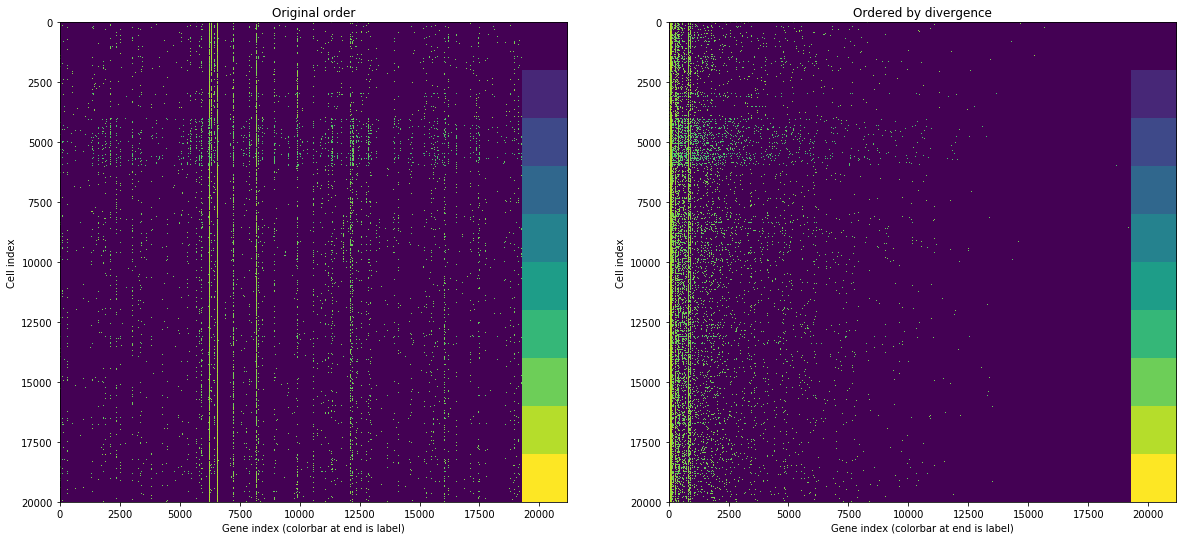

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
utils.visualize_data(utils.preprocess(data_0), labels, ax = ax[0])
utils.visualize_data(utils.preprocess(data_0, colInds), labels, ax = ax[1])
ax[0].set_title("Original order")
ax[1].set_title("Ordered by divergence");